<a href="https://colab.research.google.com/github/thanadolch/data_viz/blob/main/Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [3]:
path = '/content/drive/My Drive/DVZ'

In [4]:
pubgx = pd.read_csv(os.path.join(path,'kill_match_stats_final_0.csv'))

In [5]:
pubgx

killed_by       killer_name  ...  victim_position_x  victim_position_y
0              Grenade   KrazyPortuguese  ...          657725.10           146275.2
1               SCAR-L  nide2Bxiaojiejie  ...           92238.68           723375.1
2                 S686          Ascholes  ...          367304.50           421216.1
3         Down and Out        Weirdo7777  ...          476645.90           316758.4
4                 M416         Solayuki1  ...          473588.50           318418.8
...                ...               ...  ...                ...                ...
13426343      Bluezone               NaN  ...          165267.30           601221.8
13426344  Down and Out         Subastral  ...          299201.80           504790.9
13426345        SCAR-L            TingFg  ...          447025.30           628270.8
13426346        SCAR-L         OldBlack6  ...          152887.40           315209.8
13426347  Down and Out         liuyang23  ...          447621.90           628611.0

[13426348 rows x 12 columns]

In [6]:
pubgx['map'] = pubgx['map'].fillna('ERANGEL')

In [7]:
pubgx['map'].isnull().any()

False

In [8]:
 def get_cadio(pubd_k):
      pubg_bb = {}
      for map in pubd_k['map']:
          for category in map:
              category = category
              if category in pubg_bb: # increase current category count
                  pubg_bb[category] = pubg_bb[category] + 1
              else: # create new category in pubg_bb object
                  pubg_bb[category] = 1
      return pd.DataFrame(pubg_bb.values())

In [9]:
def fix_country_col(data):
    new_col = []
    for row in data["map"]:
        new_col.append(row.split(","))
    return new_col

In [10]:
pubg = pubgx.iloc[:,0:6]

In [11]:
pubg['map'] = fix_country_col(pubg)

In [12]:
 def get_cadio(pubd_k):
      pubg_bb = {}
      for map in pubd_k['map']:
          for category in map:
              category = category
              if category in pubg_bb: # increase current category count
                  pubg_bb[category] = pubg_bb[category] + 1
              else: # create new category in pubg_bb object
                  pubg_bb[category] = 1
      return pd.DataFrame(pubg_bb.values(),index=pubg_bb.keys())

In [13]:
categories = get_cadio(pubg).reset_index()
categories.columns = ["category", "count"]
categories

category     count
0  MIRAMAR   2398143
1  ERANGEL  11028205

<BarContainer object of 2 artists>

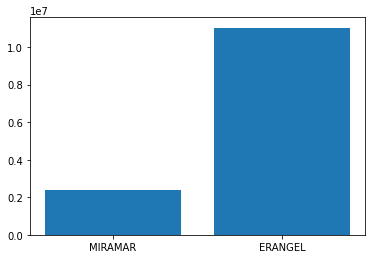

In [14]:
plt.bar(categories['category'],categories['count'])

In [15]:
def fix_country_col(data):
    new_col = []
    for row in data["killed_by"]:
        new_col.append(row.split(","))
    return new_col

In [16]:
pubg['killed_by'] = fix_country_col(pubg)

In [17]:
 def get_cadioss(pubd_k):
      pubg_bb = {}
      for killed_by in pubd_k['killed_by']:
          for category in killed_by:
              category = category
              if category in pubg_bb: # increase current category count
                  pubg_bb[category] = pubg_bb[category] + 1
              else: # create new category in pubg_bb object
                  pubg_bb[category] = 1
      return pd.DataFrame(pubg_bb.values(),index=pubg_bb.keys())

In [18]:
gun_shot = get_cadioss(pubg).reset_index()
gun_shot.columns = ["gun_shot", "count"]
gun_shot['count'] = gun_shot['count'].sort_values()
gun_shot

gun_shot    count
0                           Grenade   241523
1                            SCAR-L  1252632
2                              S686   329326
3                      Down and Out  2310417
4                              M416  1538312
5                             Punch   353928
6                               AKM  1142941
7                               P92   149565
8                             Win94    26723
9                             M16A4  1237998
10                             S12K   299421
11                       Hit by Car   125566
12              death.WeapSawnoff_C    13051
13                           Kar98k   348114
14                        Tommy Gun   169611
15                            S1897   569420
16                         Bluezone   657889
17                        Micro UZI   268974
18                            P1911   151251
19                              SKS   311528
20                          Mini 14   409859
21                             Mk14    16835
22                          Falling   145466
23                             UMP9   737322
24                             P18C    15952
25                          Machete     6421
26                           Sickle     5151
27                            Groza    42178
28                         Crossbow    21907
29                            Drown    56265
30                           Vector    77513
31                            R1895    37779
32                             M249    29457
33                              Uaz    44935
34                              M24    41546
35                              VSS    33170
36                              Pan    18310
37                              AWM    29596
38                          RedZone    17161
39                        Motorbike    11467
40                            Buggy     9628
41  death.ProjMolotov_DamageField_C     8634
42                            Dacia    19559
43                            DP-28    36182
44                              R45     8492
45              Motorbike (SideCar)    12971
46             death.Buff_FireDOT_C     3273
47                          Crowbar     5532
48                              AUG    11469
49                              Van      793
50                     Pickup Truck    10994
51                         Aquarail       65
52                             Boat     1761
53              death.ProjMolotov_C      303
54               death.PG117_A_01_C       40
55              death.RedZoneBomb_C      171
56             death.PlayerMale_A_C        1

In [19]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [20]:
sorted_category=  gun_shot.sort_values(by="count")
trace = go.Bar(x=sorted_category['count'], y=sorted_category['gun_shot'], orientation="h", 
               marker_color='MediumPurple')
layout = go.Layout(title="Countries with most content", height=700, 
                   legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure([trace], layout=layout)
fig.show()

In [21]:
import plotly.express as px

In [22]:
pubgx.iloc[0:100000,0:6]

killed_by       killer_name  ...  killer_position_y      map
0           Grenade   KrazyPortuguese  ...           146275.2  MIRAMAR
1            SCAR-L  nide2Bxiaojiejie  ...           722236.4  MIRAMAR
2              S686          Ascholes  ...           421623.9  MIRAMAR
3      Down and Out        Weirdo7777  ...           313274.8  MIRAMAR
4              M416         Solayuki1  ...           318340.5  MIRAMAR
...             ...               ...  ...                ...      ...
99995          S12K       KOR_Glucose  ...           639807.7  ERANGEL
99996          S12K     Ronaldooooooo  ...           636511.7  ERANGEL
99997       Mini 14   xXbyCarlosProXx  ...           640161.9  ERANGEL
99998           SKS           Coreyxy  ...           307356.0  ERANGEL
99999        SCAR-L           Hect0rr  ...           300063.2  ERANGEL

[100000 rows x 6 columns]

In [23]:
df = pubgx.iloc[0:100000,:]
df = df[df['map']=='ERANGEL']
df

killed_by      killer_name  ...  victim_position_x  victim_position_y
179    Down and Out        Malcolm_x  ...           497385.4           331528.2
180           M16A4        Malcolm_x  ...           497819.4           331981.3
181             AKM           G_Berg  ...           459817.9           414426.3
182             AKM      Lukesnake17  ...           487444.2           347651.0
183             SKS         AlooGobi  ...           493043.4           434458.1
...             ...              ...  ...                ...                ...
99995          S12K      KOR_Glucose  ...           430804.8           639150.2
99996          S12K    Ronaldooooooo  ...           439504.1           636380.6
99997       Mini 14  xXbyCarlosProXx  ...           428695.8           636864.9
99998           SKS          Coreyxy  ...           488266.3           301544.5
99999        SCAR-L          Hect0rr  ...           484317.7           299640.9

[80456 rows x 12 columns]

In [24]:
fig = px.scatter(df, x="killer_position_x",y="killer_position_y",hover_data=['killer_placement'],color="map")
fig.show()

In [25]:
fig = px.scatter(df, x="victim_position_x",y="victim_position_y",hover_data=['victim_placement'])
fig.show()

In [26]:
df_MIRAMAR = pubgx.iloc[0:100000,0:6]
df_MIRAMAR = df_MIRAMAR[df_MIRAMAR['map']=='MIRAMAR']

In [27]:
fig = px.scatter(df_MIRAMAR, x="killer_position_x",y="killer_position_y",hover_data=['killer_placement'],color="map")
fig.show()

In [28]:
M14 = df[df['killed_by']=='M416']
M14

killed_by     killer_name  ...  victim_position_x  victim_position_y
184        M416           Powfa  ...           495755.7           438322.0
186        M416    DevilBlood35  ...           509867.3           437920.8
189        M416        AlooGobi  ...           498006.2           437488.8
197        M416      biubiu_RNG  ...           450792.1           629575.1
207        M416    DevilBlood35  ...           505057.9           442163.2
...         ...             ...  ...                ...                ...
99953      M416          zaozuo  ...           484262.4           297571.7
99964      M416  yugexiangchiji  ...           534399.0           312406.6
99966      M416      Bei1ei_mao  ...           477270.6           288618.7
99972      M416      LeoManfrin  ...           538773.9           236687.9
99988      M416         Ryao333  ...           484402.1           297396.7

[8886 rows x 12 columns]

<function matplotlib.pyplot.show>

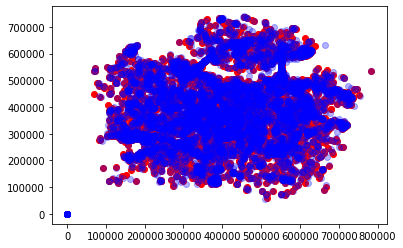

In [29]:
plt.scatter(M14['killer_position_x'],M14['killer_position_y'],c='red')
plt.scatter(M14['victim_position_x'],M14['victim_position_y'],c='blue',alpha=0.3)
plt.show

In [30]:
pubg_0000 = pubgx.iloc[0:100000,:]

In [31]:
fig = px.scatter_3d(pubgx.iloc[0:100000,:], x='killer_placement', y='victim_placement', z='time',color='map')
fig.show()

In [32]:
k_mean = pubgx.iloc[0:100000,:]

In [33]:
X = k_mean[['killer_placement','victim_placement','time']]
X.isnull().any()
X.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
from sklearn.cluster import KMeans

In [35]:
KMcluster = KMeans(n_clusters=5)

In [36]:
KMcluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
KM = KMcluster.predict(X)

In [40]:
X['clust'] = KM
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



killer_placement  victim_placement  time  clust
0                   5.0               5.0   823      3
1                  31.0              33.0   194      2
2                  43.0              46.0   103      2
3                   9.0              13.0  1018      3
4                   9.0              13.0  1018      3
...                 ...               ...   ...    ...
99995              25.0              19.0   165      2
99996              19.0              22.0   378      0
99997              25.0              25.0   186      2
99998               1.0               2.0  1838      4
99999               7.0               2.0  1386      1

[91257 rows x 4 columns]

In [41]:
fig = px.scatter_3d(X, x='killer_placement', y='victim_placement', z='time',color='clust')
fig.show()